<a href="https://colab.research.google.com/github/Svarich-11908/machine-learning/blob/main/11_009_Svarich_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
from tensorflow import keras
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [10]:
from google.colab import files

uploaded = files.upload()

Saving cars_new.csv to cars_new.csv


In [11]:
cars = pd.read_csv('cars_new.csv', sep=',')
cars[:5]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0


In [12]:
# Создать словарь: столбец-индекс
def create_dict(s):
  dict = {}
  for _id, name in enumerate(s):
    dict.update({name: _id})
  return dict

# Функция преобразования в one hot encoding
def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

In [13]:
#список текствоых колонок
cars.dtypes[cars.dtypes == 'object']

mark     object
model    object
body     object
kpp      object
fuel     object
dtype: object

In [15]:
# Создаём словари по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

# Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

# Запоминаем числовые параметры и нормируем
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

<ipython-input-15-b7fa79175ce5>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prices = np.array(cars['price'], dtype=np.float)


In [16]:
print(fuels_dict)

{'дизель': 0, 'гибрид': 1, 'бензин': 2, 'газ': 3, 'электро': 4}


In [17]:
volumes.mean()

1.2879530757014324e-16

In [18]:
volumes.std()

1.0

In [19]:
print(powers)

[ 0.22905575 -0.95630346 -0.87163494 ...  0.22905575 -0.75309902
  2.34576862]


In [20]:
x = []
y = []

for _id, car in enumerate(np.array(cars)):
  y.append(prices[_id])

  # В x_train объединяем все параметры: категориальные параметры добавляем в виде ohe
  x_tr = (
      to_ohe(car[0], marks_dict) +
      to_ohe(car[1], models_dict) +
      to_ohe(car[5], bodies_dict) +
      to_ohe(car[6], kpps_dict) +
      to_ohe(car[7], fuels_dict) +
      [years[_id]] +
      [mileages[_id]] +
      [volumes[_id]] +
      [powers[_id]]
  )

  # Добавляем текущую строку в общий x_train
  x.append(x_tr)

x_train = np.array(x, dtype=float)
y_train = np.array(y, dtype=float)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

In [27]:
model = Sequential([
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='linear')
])

In [30]:
#training
model.compile(optimizer='adam', loss='mae', metrics=[keras.metrics.R2Score()])
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=80, epochs=100)

Epoch 1/100
449/449 [==============================] - 6s 11ms/step - loss: 526673.8125 - r2_score: -0.6792 - val_loss: 509554.3125 - val_r2_score: -0.7893
Epoch 2/100
449/449 [==============================] - 5s 12ms/step - loss: 486230.2812 - r2_score: -0.5801 - val_loss: 433323.7500 - val_r2_score: -0.5557
Epoch 3/100
449/449 [==============================] - 5s 10ms/step - loss: 378592.8125 - r2_score: -0.2815 - val_loss: 303949.6875 - val_r2_score: -0.0984
Epoch 4/100
449/449 [==============================] - 4s 10ms/step - loss: 262108.6562 - r2_score: 0.0805 - val_loss: 216099.7188 - val_r2_score: 0.2522
Epoch 5/100
449/449 [==============================] - 5s 12ms/step - loss: 204291.4531 - r2_score: 0.2880 - val_loss: 181071.1094 - val_r2_score: 0.4062
Epoch 6/100
449/449 [==============================] - 4s 10ms/step - loss: 180333.6250 - r2_score: 0.3816 - val_loss: 166503.4219 - val_r2_score: 0.4787
Epoch 7/100
449/449 [==============================] - 6s 13ms/step - 

In [31]:
#predicting
predict = model.predict(x_test)

351/351 [==============================] - 1s 3ms/step


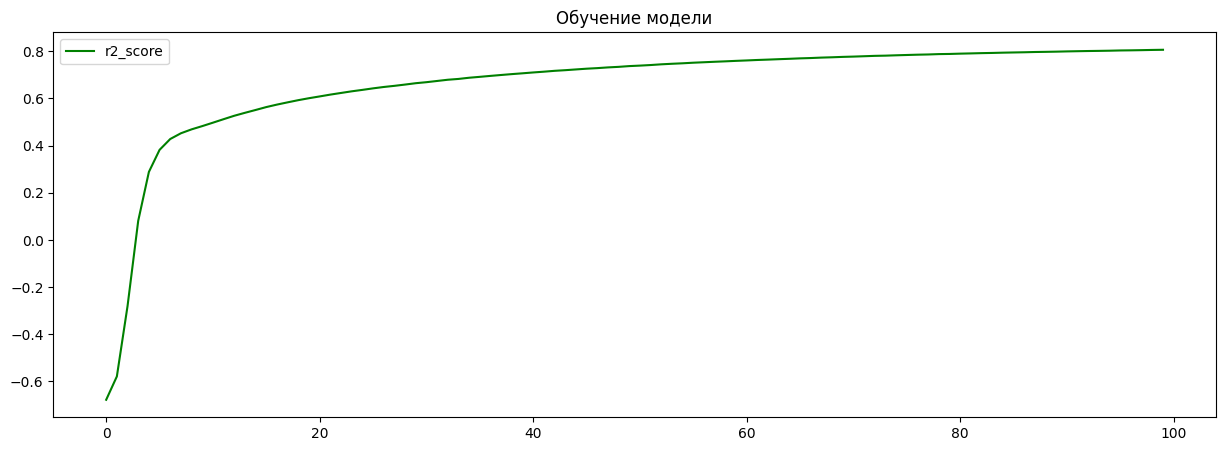

In [33]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['r2_score'], label='val_r2_score', color='green')
plt.title('Обучение модели')
plt.legend(['r2_score'])
plt.show()

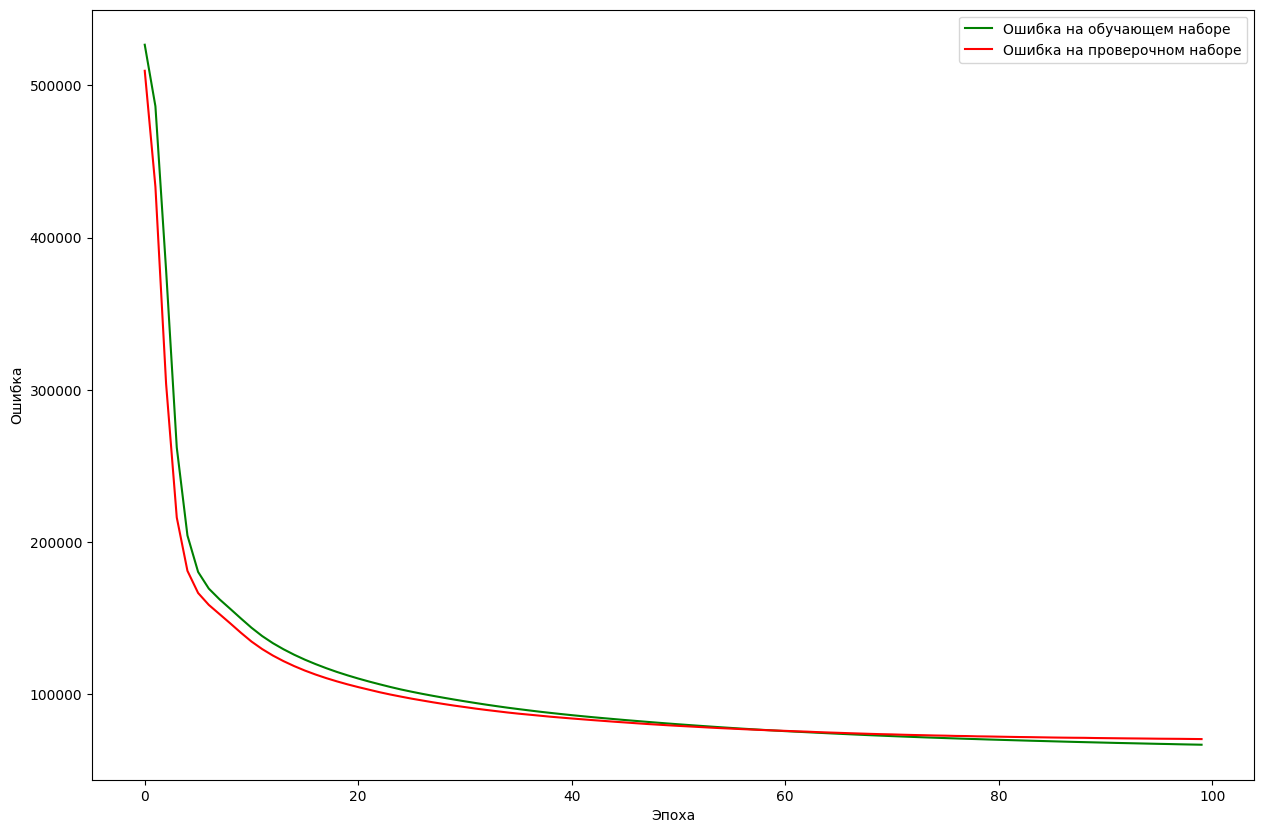

In [39]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе', color='green')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе', color='red')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()